In [1]:
import gensim
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [2]:
playlists = word2vec.LineSentence('playlists.txt')
music_model = word2vec.Word2Vec(playlists, size=64, window=100, min_count=10)

2018-11-08 21:46:09,376 : INFO : collecting all words and their counts
2018-11-08 21:46:09,377 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-08 21:46:09,430 : INFO : PROGRESS: at sentence #10000, processed 107891 words, keeping 3250 word types
2018-11-08 21:46:09,474 : INFO : collected 3292 word types from a corpus of 189900 raw words and 18111 sentences
2018-11-08 21:46:09,475 : INFO : Loading a fresh vocabulary
2018-11-08 21:46:09,480 : INFO : effective_min_count=10 retains 2228 unique words (67% of original 3292, drops 1064)
2018-11-08 21:46:09,481 : INFO : effective_min_count=10 leaves 183255 word corpus (96% of original 189900, drops 6645)
2018-11-08 21:46:09,487 : INFO : deleting the raw counts dictionary of 3292 items
2018-11-08 21:46:09,489 : INFO : sample=0.001 downsamples 59 most-common words
2018-11-08 21:46:09,490 : INFO : downsampling leaves estimated 173511 word corpus (94.7% of prior 183255)
2018-11-08 21:46:09,495 : INFO : estimated 

In [3]:
music_model.wv['299']

array([-0.08593731,  0.4301329 ,  0.6864592 ,  0.6157894 , -0.08427662,
       -0.21230103,  1.2747461 ,  0.30287948,  0.15494926, -0.04562093,
       -0.14552118, -0.7621008 , -0.38385525,  0.04565135,  0.5704667 ,
       -0.97916704, -0.795355  ,  0.668004  ,  0.6168136 ,  0.49087065,
        0.16781001, -0.6887734 ,  0.8786274 ,  0.21335714,  0.3559394 ,
       -0.55021036,  0.1307931 , -0.88349503,  0.8823384 ,  0.6629035 ,
       -0.43765977,  0.76729846, -0.25651315, -0.3760812 ,  0.2413734 ,
       -0.06235044, -0.12208037, -0.5066879 ,  0.55806345, -0.6873947 ,
        0.17468365, -0.06338488, -0.6129271 , -0.8004174 ,  0.435613  ,
       -0.5179212 , -0.34126052, -0.3706677 , -0.0293368 , -0.13813509,
        0.32940495, -1.4190776 ,  0.23203796,  0.21860689,  0.6999654 ,
       -0.40721166, -0.57349396,  0.0431204 ,  0.5865998 ,  0.39822295,
       -0.22574879, -1.3853921 , -0.7846271 ,  0.13009799], dtype=float32)

In [4]:
artist = [art.strip() for art in open('artists.txt', 'r')]
artist[0:10]

['Everette Harp',
 'Bishop Paul S. Morton & Aretha Franklin',
 'Frankie Ballard',
 'Herb Alpert',
 'Rod Stewart & Chaka Khan',
 'Scars On 45',
 'New Radicals',
 'Crosby, Stills & Nash',
 'Ledisi',
 'La Quinta Estacion']

In [5]:
id2name = {}
name2id = {}
for w in range(len(artist)):
    id2name["%s" % w] = artist[w]
    name2id[artist[w]] = "%s" % w

id2name[name2id['Elton John']]

'Elton John'

In [6]:
def similar_artists(model, artist, n=5):
    id = name2id[artist]
    out = model.wv.most_similar(id, topn=n)

    print("artists similar to '%s'\n" % artist)
    for i in range(n) :
        name = id2name[out[i][0]]
        print("\t%s" % name)
        
similar_artists(music_model, 'Aerosmith')

2018-11-08 21:46:10,497 : INFO : precomputing L2-norms of word weight vectors


artists similar to 'Aerosmith'

	Billy Idol
	The Black Crowes
	Def Leppard
	Georgia Satellites
	Seven Mary Three


/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_artists(model, artists, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,64), dtype='f')

    # add the vector for each of the closest words to the array
    for a in range(len(artists)):
        id = name2id[artists[a]]
        arr = np.append(arr, np.array([model[id]]), axis=0)

    voc = [w for w in model.wv.vocab]
    ids = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in ids:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(artists)], y_coord[0:len(artists)],s=size2)
    
    # label the input words
    for w in range(len(artists)):
        plt.annotate(artists[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


<IPython.core.display.Javascript object>


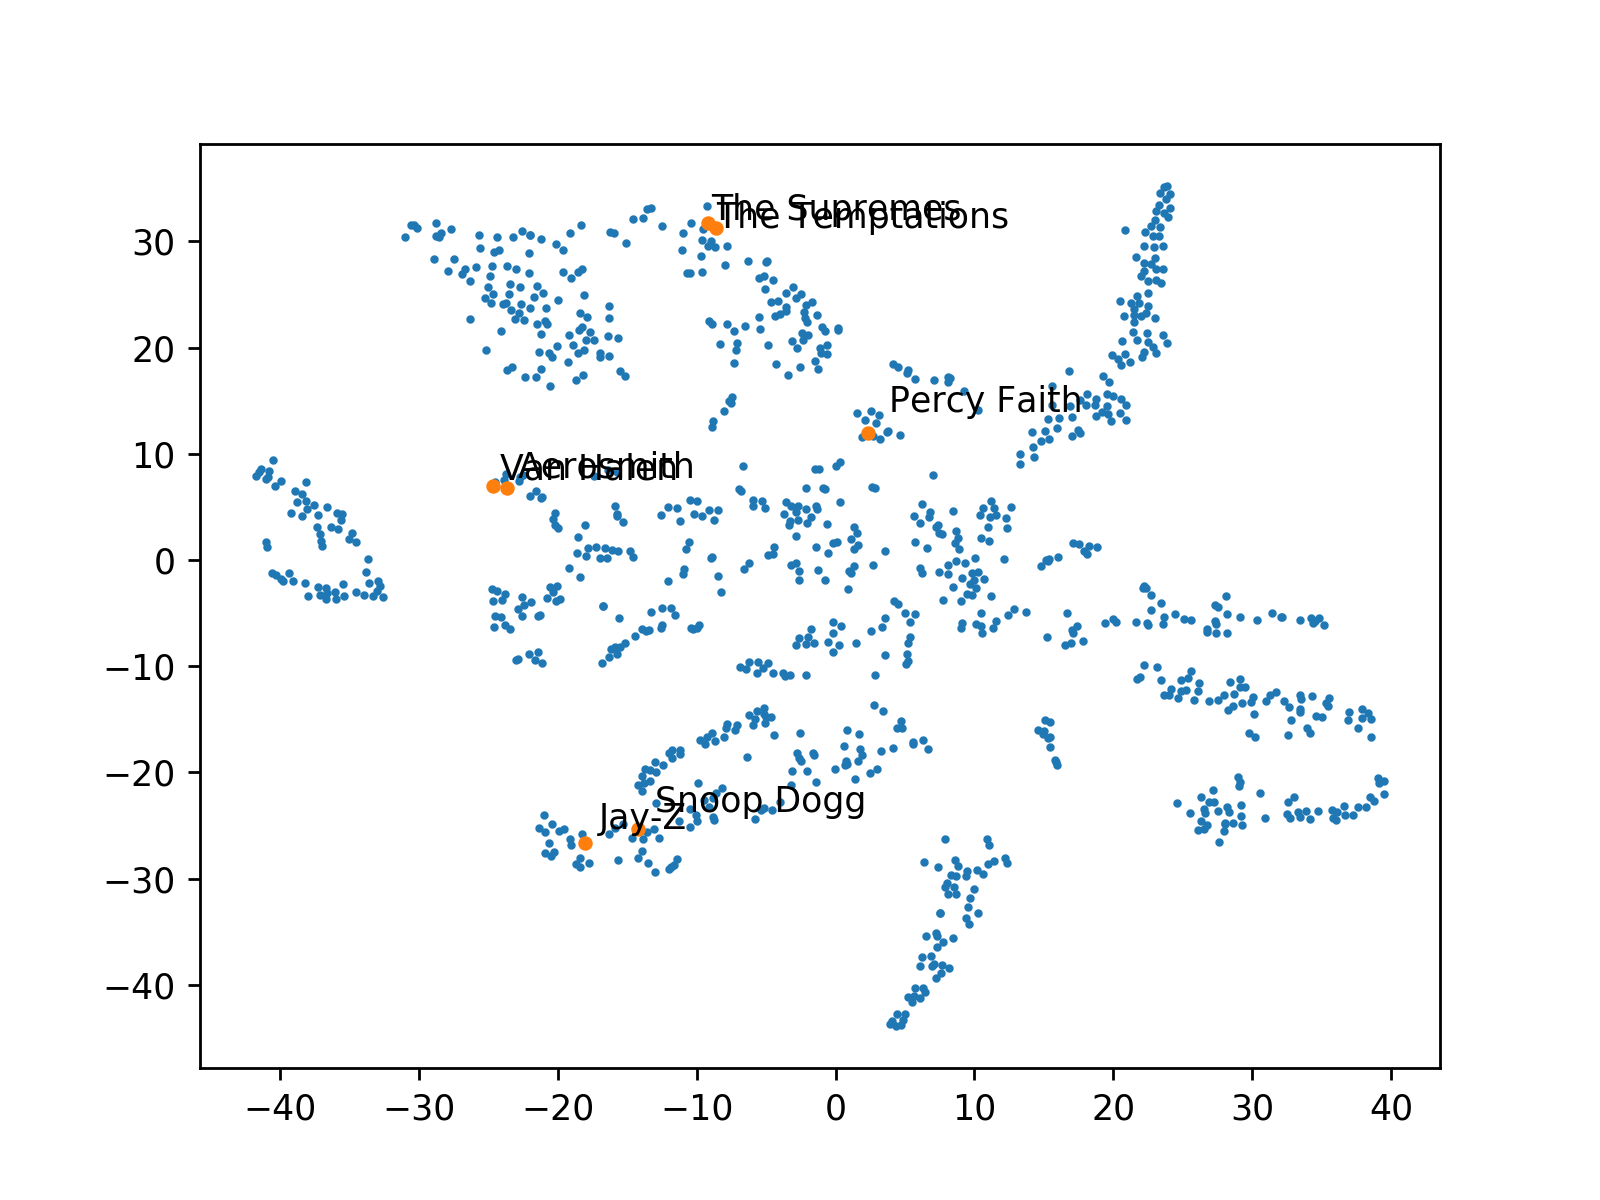

In [8]:
display_tsne_artists(music_model, \
                     ['The Temptations', 'The Supremes', 'Van Halen', 'Aerosmith', 'Jay-Z', 'Snoop Dogg'], \
                     nsample=1000, offset=1)